In [80]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [4]:
# Load the dataset 
df = pd.read_csv('Documents/Syracuse University/IST 718 Big Data Analytics/Week 2/dodgers.csv')
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


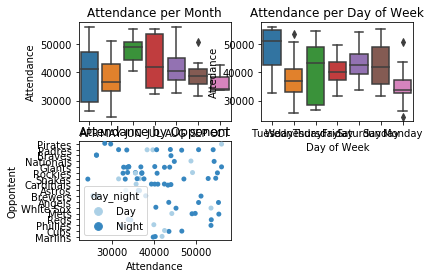

In [33]:
# Explore attendance distribution by month, day of the week, and opponent. 
plt.figure()
plt.subplot(2, 2, 1)
sns.boxplot(x='month', y='attend', data=df)
_ = plt.xlabel('Month')
_ = plt.ylabel('Attendance')
_ = plt.title('Attendance per Month')

plt.subplot(2, 2, 2)
sns.boxplot(x='day_of_week', y='attend', data=df)
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Attedance')
_ = plt.title('Attendance per Day of Week')

plt.subplot(2, 2, 3)
sns.stripplot(x='attend', y='opponent', data=df, hue='day_night', palette='Blues')
_ = plt.xlabel('Attendance')
_ = plt.ylabel('Oppontent')
_ = plt.title('Attendance by Opponent')

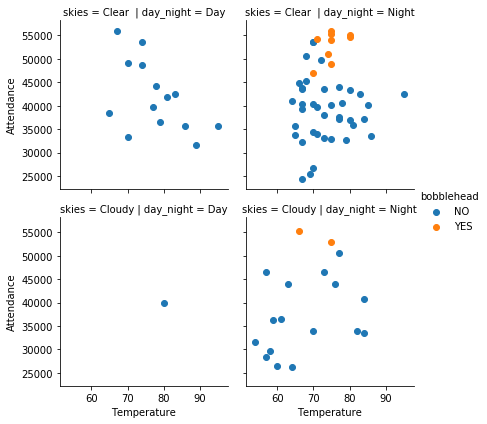

In [68]:
# Explore attendance by temperature and bobblehead promotion
g = sns.FacetGrid(df, col='day_night', row='skies', hue='bobblehead')
g = (g.map(plt.scatter, 'temp', 'attend').add_legend())
g = g.set_axis_labels('Temperature', 'Attendance')

In [115]:
# Create a new data frame keeping month, day_of_week, bobblehead, and attendance columns.
df2 = df[['month', 'day_of_week', 'bobblehead', 'attend']]

# Use LabelEncoder to convert month, day_of_week, and bobblehead to numeric values.
le = LabelEncoder()
indexCols = ['month', 'day_of_week', 'bobblehead']
for i in indexCols:
    df2.loc[:,i] = le.fit_transform(df2.loc[:,i])

# Estabilsh a random seed and split the data into train and test sets. 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(df2[['month', 'day_of_week', 'bobblehead']], df2['attend'], test_size=0.3)

# Build the linear model
lm = LinearRegression()
model = lm.fit(X_train, y_train)


C:\Users\malon\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [137]:
    # Print the model results.
    print('Model Score:', model.score(X_train, y_train))
    print('Y-Intercept:',model.intercept_)
    print(list(zip(indexCols, model.coef_)))

Model Score: 0.43335477068650347
Y-Intercept: 38885.183223889464
[('month', -31.1725057198039), ('day_of_week', -193.77441687713488), ('bobblehead', 14568.517748922892)]


The model predicts that a bobblehead event would increase attendance by 14,569 thousand fans. 

In [ ]:
# Create new graph. 

In [ ]:
# Try building a different model. 